In [1]:
%reload_ext autoreload
%autoreload 2

In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split

import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime as time


In [3]:
data = pd.read_csv("../assets/ratings.csv") # https://grouplens.org/datasets/movielens/
data.columns = ["userId", "movieId", "rating", "timestamp"]
data.head()

,userId,movieId,rating,timestamp
0,1,3,4.0,964981247
1,1,6,4.0,964982224
2,1,47,5.0,964983815
3,1,50,5.0,964982931
4,1,70,3.0,964982400


In [4]:
# проверка, можно ли использовать идентификаторы как индексы
print(np.all(data['userId'].unique() == np.arange(1, len(data['userId'].unique())+1))) # можно, но если сделать -1
print(np.all(data['movieId'].unique() == np.arange(1, len(data['movieId'].unique())+1))) # нельзя


True
False


In [5]:
data['userIdx'] = data['userId'] - 1

movie_id2idx = {id_: idx for idx, id_ in enumerate(sorted(data['movieId'].unique()))}
data['movieIdx'] = data['movieId'].map(movie_id2idx)

data_train, data_test = train_test_split(data, test_size=0.15, random_state=0)
data_train.shape, data_test.shape

((85709, 6), (15126, 6))

In [6]:
from lfm import LFM

model = LFM(
    n_clients=len(data['userIdx'].unique()),
    n_objects=len(data['movieIdx'].unique()),
    n_factors=10,
    lr=0.01,
    reg=0.01,
    rating_interval=(0, 5)
)


In [7]:
logged_metrics = model.fit(train_data=data_train, test_data=data_test, epochs=30)

Epoch 1:   0%|          | 0/85709 [00:00<?, ?it/s]

Epoch 1: 100%|██████████| 85709/85709 [00:05<00:00, 14698.95it/s]


Train | RMSE=1.595 | MAE=1.253 ||| Test | RMSE=1.762 | MAE=1.361


Epoch 2: 100%|██████████| 85709/85709 [00:05<00:00, 16028.98it/s]


Train | RMSE=1.324 | MAE=1.037 ||| Test | RMSE=1.509 | MAE=1.161


Epoch 3: 100%|██████████| 85709/85709 [00:05<00:00, 16144.84it/s]


Train | RMSE=1.198 | MAE=0.934 ||| Test | RMSE=1.393 | MAE=1.068


Epoch 4: 100%|██████████| 85709/85709 [00:05<00:00, 14821.74it/s]


Train | RMSE=1.120 | MAE=0.868 ||| Test | RMSE=1.318 | MAE=1.006


Epoch 5: 100%|██████████| 85709/85709 [00:06<00:00, 13808.09it/s]


Train | RMSE=1.069 | MAE=0.826 ||| Test | RMSE=1.271 | MAE=0.966


Epoch 6: 100%|██████████| 85709/85709 [00:06<00:00, 14208.71it/s]


Train | RMSE=1.030 | MAE=0.795 ||| Test | RMSE=1.234 | MAE=0.936


Epoch 7: 100%|██████████| 85709/85709 [00:06<00:00, 13646.96it/s]


Train | RMSE=0.999 | MAE=0.768 ||| Test | RMSE=1.209 | MAE=0.915


Epoch 8: 100%|██████████| 85709/85709 [00:06<00:00, 14162.59it/s]


Train | RMSE=0.974 | MAE=0.749 ||| Test | RMSE=1.187 | MAE=0.898


Epoch 9: 100%|██████████| 85709/85709 [00:06<00:00, 13921.12it/s]


Train | RMSE=0.953 | MAE=0.732 ||| Test | RMSE=1.170 | MAE=0.883


Epoch 10: 100%|██████████| 85709/85709 [00:06<00:00, 13280.85it/s]


Train | RMSE=0.935 | MAE=0.718 ||| Test | RMSE=1.158 | MAE=0.874


Epoch 11: 100%|██████████| 85709/85709 [00:05<00:00, 14285.69it/s]


Train | RMSE=0.920 | MAE=0.707 ||| Test | RMSE=1.146 | MAE=0.864


Epoch 12: 100%|██████████| 85709/85709 [00:05<00:00, 14308.43it/s]


Train | RMSE=0.908 | MAE=0.696 ||| Test | RMSE=1.134 | MAE=0.854


Epoch 13: 100%|██████████| 85709/85709 [00:06<00:00, 13897.33it/s]


Train | RMSE=0.896 | MAE=0.687 ||| Test | RMSE=1.128 | MAE=0.848


Epoch 14: 100%|██████████| 85709/85709 [00:05<00:00, 14354.22it/s]


Train | RMSE=0.884 | MAE=0.679 ||| Test | RMSE=1.122 | MAE=0.843


Epoch 15: 100%|██████████| 85709/85709 [00:05<00:00, 14511.77it/s]


Train | RMSE=0.874 | MAE=0.671 ||| Test | RMSE=1.114 | MAE=0.837


Epoch 16: 100%|██████████| 85709/85709 [00:06<00:00, 13747.61it/s]


Train | RMSE=0.864 | MAE=0.663 ||| Test | RMSE=1.107 | MAE=0.831


Epoch 17: 100%|██████████| 85709/85709 [00:05<00:00, 14316.83it/s]


Train | RMSE=0.858 | MAE=0.658 ||| Test | RMSE=1.106 | MAE=0.830


Epoch 18: 100%|██████████| 85709/85709 [00:06<00:00, 13652.07it/s]


Train | RMSE=0.850 | MAE=0.652 ||| Test | RMSE=1.101 | MAE=0.824


Epoch 19: 100%|██████████| 85709/85709 [00:06<00:00, 13873.70it/s]


Train | RMSE=0.841 | MAE=0.645 ||| Test | RMSE=1.097 | MAE=0.821


Epoch 20: 100%|██████████| 85709/85709 [00:05<00:00, 14349.13it/s]


Train | RMSE=0.836 | MAE=0.642 ||| Test | RMSE=1.094 | MAE=0.819


Epoch 21: 100%|██████████| 85709/85709 [00:06<00:00, 14026.58it/s]


Train | RMSE=0.829 | MAE=0.636 ||| Test | RMSE=1.093 | MAE=0.816


Epoch 22: 100%|██████████| 85709/85709 [00:06<00:00, 14268.78it/s]


Train | RMSE=0.823 | MAE=0.632 ||| Test | RMSE=1.089 | MAE=0.814


Epoch 23: 100%|██████████| 85709/85709 [00:06<00:00, 13943.34it/s]


Train | RMSE=0.817 | MAE=0.627 ||| Test | RMSE=1.086 | MAE=0.810


Epoch 24: 100%|██████████| 85709/85709 [00:06<00:00, 14025.39it/s]


Train | RMSE=0.812 | MAE=0.623 ||| Test | RMSE=1.085 | MAE=0.809


Epoch 25: 100%|██████████| 85709/85709 [00:06<00:00, 14252.17it/s]


Train | RMSE=0.807 | MAE=0.620 ||| Test | RMSE=1.085 | MAE=0.810


Epoch 26: 100%|██████████| 85709/85709 [00:05<00:00, 14336.28it/s]


Train | RMSE=0.802 | MAE=0.617 ||| Test | RMSE=1.082 | MAE=0.807


Epoch 27: 100%|██████████| 85709/85709 [00:06<00:00, 13669.48it/s]


Train | RMSE=0.797 | MAE=0.612 ||| Test | RMSE=1.082 | MAE=0.807


Epoch 28: 100%|██████████| 85709/85709 [00:05<00:00, 14428.19it/s]


Train | RMSE=0.793 | MAE=0.609 ||| Test | RMSE=1.082 | MAE=0.808


Epoch 29: 100%|██████████| 85709/85709 [00:06<00:00, 13864.57it/s]


Train | RMSE=0.789 | MAE=0.606 ||| Test | RMSE=1.081 | MAE=0.806


Epoch 30: 100%|██████████| 85709/85709 [00:06<00:00, 13520.76it/s]


Train | RMSE=0.784 | MAE=0.603 ||| Test | RMSE=1.079 | MAE=0.803


In [8]:
logged_metrics["fitting_time_ms"] / 1000

12.456166999999999

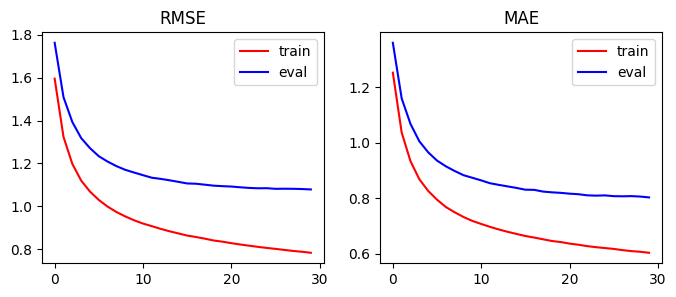

In [9]:
fig, axes = plt.subplots(1, 2, figsize=(8, 3))

axes[0].plot(logged_metrics["train_rmse"], 'r', label='train')
axes[0].plot(logged_metrics["eval_rmse"], 'b', label='eval')
axes[0].set_title("RMSE")
axes[0].legend()

axes[1].plot(logged_metrics["train_mae"], 'r', label='train')
axes[1].plot(logged_metrics["eval_mae"], 'b', label='eval')
axes[1].set_title("MAE")
axes[1].legend()

In [10]:
from surprise import Dataset, Reader, SVD
from surprise.model_selection import cross_validate

reader = Reader(line_format="user item rating timestamp", sep=",")
data = Dataset.load_from_file("../assets/ratings.csv", reader=reader)

In [11]:
print("Surprise Library with Cross-validation:")
surprise_metrics_dict = cross_validate(SVD(), data, verbose=True)

Surprise Library with Cross-validation:
Evaluating RMSE, MAE of algorithm SVD on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    0.8693  0.8775  0.8794  0.8745  0.8683  0.8738  0.0044  
MAE (testset)     0.6676  0.6724  0.6735  0.6746  0.6671  0.6710  0.0031  
Fit time          1.03    1.12    1.04    1.04    1.02    1.05    0.03    
Test time         0.10    0.17    0.10    0.17    0.09    0.13    0.04    


In [12]:
t1 = time.now()
rmse, mae = model.eval(data_test)
t2 = time.now()
print(f"Custom: RMSE = {rmse:.4f}, MAE = {mae:.4f}" 
      f"\nfit time = {logged_metrics["fitting_time_ms"] / 1000:.3f} s, test time = {(t2-t1).microseconds/1000:.3f} ms")

Custom: RMSE = 1.0790, MAE = 0.8029
fit time = 12.456 s, test time = 778.735 ms
